# Materials Data

<div style="background-color: #f8d7da; border-left: 6px solid #ccc; margin: 20px; padding: 15px;">
    <strong>💡 Michael Ashby and David Jones:</strong> How is the engineer to choose from this vast menu the material that best suits the purpose?
</div>

<iframe class="speakerdeck-iframe" frameborder="0" src="https://speakerdeck.com/player/054e4d175cfc4419842d34f0d47a9b8e" title="Machine Learning for Materials (Lecture 3)" allowfullscreen="true" style="border: 0px; background-clip: padding-box; background-color: rgba(0, 0, 0, 0.1); margin: 0px; padding: 0px; border-radius: 6px; box-shadow: rgba(0, 0, 0, 0.2) 0px 5px 40px; width: 100%; height: auto; aspect-ratio: 560 / 420;" data-ratio="1.3333333333333333"></iframe>

[Lecture slides](https://speakerdeck.com/aronwalsh/mlformaterials-lecture3-ml)

## 🚀 Data-driven thermoelectrics

The goal today is to access, filter, and visualise materials data. There is a growing number of open computational materials science databases that include [Materials Project](https://materialsproject.org), [NOMAD](https://nomad-lab.eu), [OQMD](https://oqmd.org), and [AFLOW](http://www.aflowlib.org). 

We will use an application programming interface (API) via Python. Open Databases Integration for Materials Design ([OPTIMADE](https://www.optimade.org)) provides access to >20 databases and >20 million structures using a single interface.

<div style="background-color: #d4edda; border-left: 6px solid #ccc; margin: 20px; padding: 15px; border-radius: 5px;">
    <strong>🚨 Data warning:</strong> Many computational databases are based on the properties of static crystals. In reality, temperature influences the structures and properties of materials. We have to start somewhere, but keep this in mind when judging the utility of derived models and the trust in "ground truth" reference data.
</div>

In [9]:
# Installation of libraries
# !pip install optimade --quiet
# !pip install matminer --quiet
# !pip install elementembeddings --quiet #poorly setup dependencies
# !pip install pymatviz --quiet 
# !pip install plotly --quiet 

In [10]:
# Import of modules
import pandas as pd  # Data manipulation with DataFrames
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import pprint  # Pretty print data structures
import os  # Operating system functions

<details>
<summary>Colab error solution</summary>
If running the import module cell fails with an "AttributeError", click `Runtime` -> `Restart Session` and then simply rerun the cell. 
</details>

## Database queries

In the following Python code, we use OPTIMADE to query a database and retrieve structures that contain a specified number of elements. 

The steps include:

* _Initialise the OPTIMADE client:_ specify the database provider.

* _Define a filter:_ set the criteria for filtering the materials data.

* _Retrieve and process data:_ Query the database using the filter and process the retrieved data.

In [11]:
from optimade.client import OptimadeClient

# Initialise with specified provider
client = OptimadeClient(include_providers={"mp"})  
   # Other providers include "mp", "alexandria", "oqmd", "jarvis", "aflow"

# Define a filter to find structures with exactly n elements
filters = ['nelements=8']

# Process each filter to fetch and display relevant data
for f in filters:
    # Retrieve data using the client
    result = client.get(f)
    
    if 'structures' in result and f in result['structures']:
        provider_data = next(iter(result['structures'][f].values()))
        structures_data = provider_data['data']

        # Print the count of structures found
        print(f"Count for filter '{f}': {len(structures_data)}")

        # Print a summary of each structure's ID and formula
        print("Summary of Compounds:")
        for structure in structures_data:
            structure_id = structure.get('id', 'No ID provided')
            formula = structure.get('attributes', {}).get('chemical_formula_descriptive', 'No formula provided')
            print(f"ID: {structure_id}, Formula: {formula}")
    else:
        print("No data found for this filter.")

Output()

Retrieved databases from mp

Output()

╭─────────────────────────────────────────────────╮
│ Performing query structures/?filter=nelements=8 │
╰─────────────────────────────────────────────────╯

Detected a running event loop (e.g., Jupyter). Attempting to switch to synchronous mode.

Count for filter 'nelements=8': 18
Summary of Compounds:
ID: mp-1214950, Formula: Ba2Ce2FeHNaO27Si8Ti2
ID: mp-1221604, Formula: Al4Ca2F8H4Mn2Na4O20P4
ID: mp-1201468, Formula: C4Cl4H24K2N4O8P2Pt2
ID: mp-1221055, Formula: Al6B3H3Mg2NaO31Si6V
ID: mp-863003, Formula: Al6B3FFe3H3NaO30Si6
ID: mp-1221086, Formula: B3Cr3H3Mg3NaO31Si6V3
ID: mp-1201374, Formula: Ag4C12Ca2Cs4H8N12O4S12
ID: mp-1221189, Formula: Ca7F4MnNa5O32Si8TiZr2
ID: mp-1221915, Formula: Ca4F2Fe2Mn2Na4O34Si8Zr4
ID: mp-562835, Formula: C18Cl4Co2Ga2H36N2O6P2
ID: mp-1223707, Formula: Fe2K2Li2Mn2Na4O48Si16Ti4
ID: mp-1224604, Formula: FeK2Li2Mn3Na4O48Si16Ti4
ID: mp-746679, Formula: C16Cl2Co2H48N2O8P4S8
ID: mp-728472, Formula: C16Cl2Fe2H48N2O8P4S8
ID: mp-1213587, Formula: Ba2K4MnNa4O58Si16Ti8W8
ID: mp-707264, Formula: C6Ca6F2H32Na2O50S2U2
ID: mp-1204081, Formula: C32Cu12H96I12Mo4N8O4S12
ID: mp-1204520, Formula: Ag4B40C60Cl8H160N4O12P8


They are complex compounds! 

We won't spend too much time delving into the specifics of each API since they each come with their own syntax and capabilities. They can also be slow for complex searches. However, it's important to grasp the overall logic behind constructing queries.

For instance, consider the following example using the Materials Project API. This query is designed to search for materials that contain Li, have a band gap between 0.5 and 1.5 eV, and consist of either two or three elements:

```python
with MPRester(ACCESS_KEY, use_document_model=False) as mpr:
    docs = mpr.materials.summary.search(
        elements=["Li"],
        band_gap=(0.5,1.5),
        num_elements=(2,3),
        fields=['material_id', 'formula_pretty', 'band_gap', 'is_stable', 'theoretical']
       )

print("Number of binary and ternary Li containing compounds with a band gap between 0.5 and 1.5 eV: ", len(docs))
```

Running this requires getting your own [access key](https://next-gen.materialsproject.org/api#api-key). We had problems last year as too many students connected at once and Imperial College got temporarily blocked! For this activity we will move forward and "cheat" by using a pre-built dataset.

## Chemical space of thermoelectric materials 

In the Lecture 2 activity, we used a [matminer](https://hackingmaterials.lbl.gov/matminer/) dataset on crystal hardness. Today we will turn to thermoelectric materials. 

Thermoelectric devices convert temperature differences directly into electrical voltage, enabling applications in power generation and refrigeration. Their efficiency is characterised by the dimensionless figure of merit (zT), which depends on electrical conductivity, Seebeck coefficient, and thermal conductivity (read more [here](https://www.nature.com/articles/nmat2090)). Let's explore the diverse compositions that give rise to these properties.

In [12]:
import matminer  # Materials informatics
from matminer.datasets.dataset_retrieval import load_dataset  # Load materals datasets

print(matminer.datasets.dataset_retrieval.get_all_dataset_info('ucsb_thermoelectrics'))

Dataset: ucsb_thermoelectrics
Description: Database of ~1,100 experimental thermoelectric materials from UCSB aggregated from 108 source publications and personal communications. Downloaded from Citrine. Source UCSB webpage is http://www.mrl.ucsb.edu:8080/datamine/thermoelectric.jsp. See reference for more information on original data aggregation. No duplicate entries are present, but each src may result in multiple measurements of the same materials' properties at different temperatures or conditions.
Columns:
	composition: Chemical formula.
	crystallinity: Either single crystal, polycrystalline, or nanoparticles.
	synthesis: Brief string describing the synthesis method
	spacegroup: Spacegroup number, if available
	rho (ohm.cm): Electrical resistivity, in ohm.cm
	S [muV/K]: Seebeck coefficient, in microVolts/K, if available
	PF [W/mK^2]: Thermoelectric power factor, conductivity * Seebeck^2, in [W/mK^2] if available
	zT: Thermoelectric figure of merit, PF * T/K, unitless, if available

The dataset is a reasonable size, so we can load it all without downsampling.

In [13]:
# Use matminer to download the dataset
df = load_dataset('ucsb_thermoelectrics')

print(f'The full dataset contains {df.shape[0]} entries. \n')
print('The DataFrame is shown below:')
df.head(10)

The full dataset contains 1093 entries. 

The DataFrame is shown below:


composition    crystallinity                            synthesis  \
1    Ti0.99Nb0.01NiSn  Polycrystalline                   Arc-melted, vacuum   
2            Cu1.98Se  Polycrystalline                       Melted, vacuum   
3              Bi2Te3   Single crystal                               Melted   
4          Cr1.3Mo6S8  Polycrystalline         Solid state reaction, vacuum   
5              LaNiO3  Polycrystalline     Evaporate nitrates (1173 K, air)   
6      Bi1.2S1.2Ti2S4  Polycrystalline  Solid-liquid-vapor reaction, vacuum   
7      Ba0.4Sr0.6PbO3  Polycrystalline  Solid state reaction (under oxygen)   
8      SrTi0.8Nb0.2O3  Polycrystalline             Solid state reaction, Ar   
9    CaMn0.98Ru0.02O3  Polycrystalline                 Solid state reaction   
10  Mg2Si0.997Bi0.003  Polycrystalline                  Mechanochemical, Ar   

    spacegroup  rho (ohm.cm)  S [muV/K]  PF [W/mK^2]        zT  kappa [W/mK]  \
1        216.0      0.001240   -192.458     0.002987  0.203822      5.861700   
2        225.0      0.003250    201.500     0.001249  1.230837      1.015000   
3        166.0      0.000450   -174.000     0.006728  0.502500      4.016716   
4          2.0      0.000693     51.220     0.000378  0.098456      2.690500   
5        167.0      0.004601    -25.760     0.000014       NaN           NaN   
6          NaN      0.000324    -41.300     0.000526  0.053719      2.940000   
7         62.0      0.004128    -82.770     0.000166  0.021697      2.294800   
8        140.0      0.001420    -62.400     0.000274  0.012720      8.620000   
9         62.0      0.024183   -195.780     0.000159       NaN           NaN   
10       225.0      0.000488    -76.600     0.001202  0.058557      6.160000   

    sigma [S/cm]   T [K]                                              src  
1        806.390   400.0  http://dx.doi.org/10.1016/j.jallcom.2008.02.041  
2        307.690  1000.0               http://dx.doi.org/10.1038/nmat3280  
3       2222.200   300.0     http://dx.doi.org/10.1201/9781420049718.ch19  
4       1442.400   700.0      http://dx.doi.org/10.1007/s11664-009-0975-0  
5        217.330   700.0          http://dx.doi.org/10.1557/PROC-793-S3.3  
6       3086.400   300.0              http://dx.doi.org/10.3390/ma3042606  
7        242.260   300.0        http://dx.doi.org/10.1023/A:1018515223271  
8        704.000   400.0              http://dx.doi.org/10.1063/1.3117943  
9         41.352   700.0  http://dx.doi.org/10.1016/S0025-5408(02)00997-2  
10      2049.200   300.0             http://dx.doi.org/10.1039/C1JM10827A

Let's perform a deeper check:

In [14]:
# Display the columns of the dataset
print("Columns in the dataset:")
print(df.columns)

# Check for any missing values in the dataset
print("\nChecking for missing values:")
print(df.isnull().sum())

Columns in the dataset:
Index(['composition', 'crystallinity', 'synthesis', 'spacegroup',
       'rho (ohm.cm)', 'S [muV/K]', 'PF [W/mK^2]', 'zT', 'kappa [W/mK]',
       'sigma [S/cm]', 'T [K]', 'src'],
      dtype='object')

Checking for missing values:
composition        0
crystallinity      0
synthesis          8
spacegroup        13
rho (ohm.cm)       0
S [muV/K]          0
PF [W/mK^2]        0
zT               379
kappa [W/mK]     379
sigma [S/cm]       0
T [K]             11
src                7
dtype: int64


<details>
<summary> Code hint </summary>
Check the DataFrame name
</details>

First, let's visualise the distribution of the zT performance metric in the dataset. This will help us understand the range and common values.

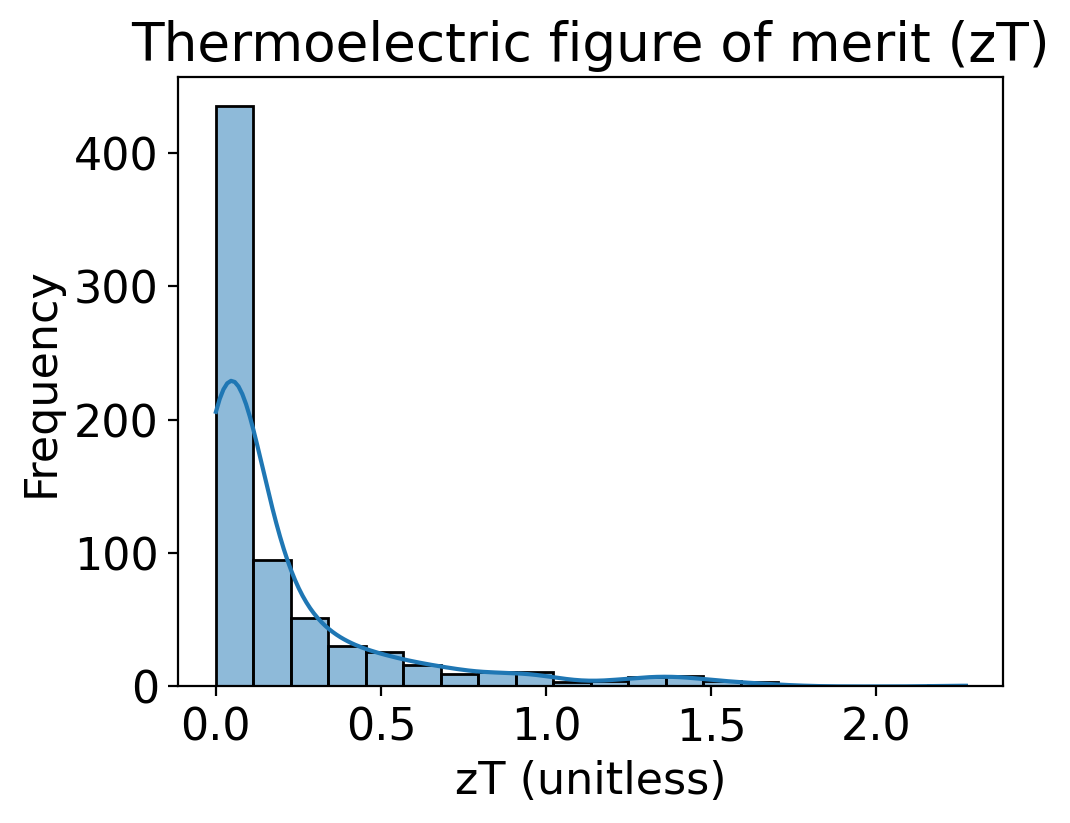

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of zT values
plt.figure(figsize=(5, 4))
sns.histplot(df['zT'], bins=20, kde=True)
plt.title('Thermoelectric figure of merit (zT)')
plt.xlabel('zT (unitless)')
plt.ylabel('Frequency')
plt.show()

<details>
<summary> Code hint </summary>
Set the number of bins for the histogram. 50?</details>

Next, we will analyse the distribution of elements within our thermoelectrics dataset by creating a heatmap over the periodic table. This would take a lot of time from scratch, but we can use the [pymatviz](https://github.com/janosh/pymatviz) package.

In [ ]:
import re
from collections import Counter
from pymatviz import ptable_heatmap

# Extract all unique elements from the composition column
elements = []
for composition in df['composition']:
    # Split each composition by non-alphanumeric characters to extract elements
    elements += [part for part in re.split('[^a-zA-Z]', composition) if part]

# Count the frequency of each element
element_counts = Counter(elements)

# Convert the Counter object to a dictionary for the heatmap
element_counts_dict = dict(element_counts)

'''
# Create the periodic table heatmap 
fig = ptable_heatmap(
    element_counts_dict, 
    colormap="viridis", 
    cbar_label_fmt="Frequency of Elements", 
    log=True,  # Use logarithmic scale for better visualisation
    value_kwargs={"fontsize": 10},  # Adjust font size for element labels
    return_type="figure"  # Return the figure for further customisation
)

# Add a title
fig.suptitle("Element Frequency in Thermoelectric Dataset", fontsize=16, fontweight="bold")

# Display the plot
plt.show()
'''

AttributeError: Figure.set() got an unexpected keyword argument 'colormap'

## Unsupervised machine learning

We have a set of materials with different compositions. We can use machine learning to visualise these in two or three dimensions. You can think of this like a materials map. 

We refer to the methods that enable us to reduce high-dimensional data into lower dimensions as [dimensionality reduction techniques](https://scikit-learn.org/stable/modules/manifold.html). These allow us to visualise complex data and in this example we will make use of Principal Component Analysis (PCA).

<details>
<summary> Overview of PCA </summary>
PCA is a popular technique for dimensionality reduction and data preprocessing, enabling the simplification of complex datasets. High-dimensional data is transformed into a new coordinate system where the axes align with the directions of maximum variance in the original data. These new axes, termed "principal components," are orthogonal. The first principal component captures the highest variance, the second captures the second highest, etc.

_Key use cases include:_

- **Dimensionality Reduction**: Identifying and eliminating less informative dimensions, reducing noise and computational complexity.

- **Data Visualisation**: Facilitating easier interpretation while preserving essential patterns.

- **Noise Reduction**: Filtering out noise or unimportant variations by focusing on significant variance.

- **Feature Engineering**: A preprocessing step to transform data before applying machine learning algorithms, potentially improving performance.

_PCA workflow:_

1. **Center the Data**: Subtract the mean from each feature to center the data around the origin.

   $
   X_{\text{centered}} = X - \bar{X}
   $

2. **Calculate Covariance Matrix**: Compute the covariance matrix to understand feature relationships and their [covariance](https://en.wikipedia.org/wiki/Covariance).

   $
   \text{Cov}(X) = \frac{1}{n}X_{\text{centered}}^T X_{\text{centered}}
   $

3. **Compute Eigenvalues and Eigenvectors**: Calculate eigenvalues ($\lambda_i$) and eigenvectors ($\mathbf{v}_i$) of the covariance matrix. Eigenvectors represent maximum variance directions, and eigenvalues quantify the variance magnitude.

   $
   \text{Cov}(X) \mathbf{v}_i = \lambda_i \mathbf{v}_i
   $

4. **Sort Eigenvalues**: Sort eigenvalues in descending order, rearranging corresponding eigenvectors accordingly.

5. **Select Principal Components**: Choose a subset of eigenvectors (principal components) based on eigenvalues, explaining the most variance in the data.

6. **Project Data**: Project original data onto selected principal components, yielding a lower-dimensional representation.

Note that PCA analysis is limited by its reliance on linear transformations of the data. In cases where non-linear structures are prominent, alternative techniques such as t-distributed Stochastic Neighbor Embedding (t-SNE) can be used.
</details>

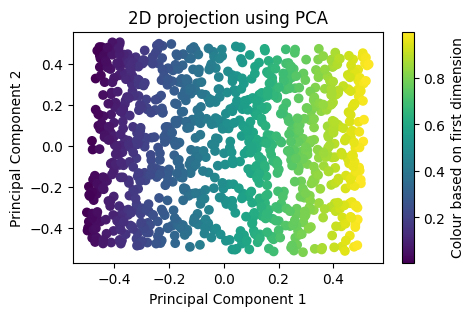

In [9]:
# Perform PCA analysis
from sklearn.decomposition import PCA
plt.rcdefaults() # Reset the matplotlib style

# Random 10D vectors for demonstration purposes
np.random.seed(42)
num_samples = 1000
dimensionality = 2
random_state = 42
data = np.random.rand(num_samples, dimensionality)

# Perform PCA to reduce the dimensionality to 2D
pca = PCA(n_components=dimensionality)
reduced_data = pca.fit_transform(data)

# Create a color map based on the original data points
   # Use the first dimension of the original data as the color value
color_map = data[:, 0]

# Plot the 2D projection
plt.figure(figsize=(5, 3))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=color_map, cmap='viridis')
plt.colorbar(label='Colour based on first dimension')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D projection using PCA')
plt.show()

<details>
<summary> Code hint </summary>
Set the number of dimensions (components) to 2
</details>

#### Featurise compositions 

Using our dataset, we can try different featurisation schemes and analyse the resulting visualisations. Here we will perform a Magpie encoding of chemical compositions using the [ElementEmbeddings](https://github.com/WMD-group/ElementEmbeddings) package.

In [10]:
from elementembeddings.composition import composition_featuriser

magpie_df = composition_featuriser(df, formula_column="composition", embedding='magpie')
magpie_df.head()

Featurising compositions...


100%|██████████| 1093/1093 [00:01<00:00, 709.62it/s]


Computing feature vectors...


100%|██████████| 1093/1093 [00:00<00:00, 278499.14it/s]


composition    crystallinity                         synthesis  \
1  Ti0.99Nb0.01NiSn  Polycrystalline                Arc-melted, vacuum   
2          Cu1.98Se  Polycrystalline                    Melted, vacuum   
3            Bi2Te3   Single crystal                            Melted   
4        Cr1.3Mo6S8  Polycrystalline      Solid state reaction, vacuum   
5            LaNiO3  Polycrystalline  Evaporate nitrates (1173 K, air)   

   spacegroup  rho (ohm.cm)  S [muV/K]  PF [W/mK^2]        zT  kappa [W/mK]  \
1       216.0      0.001240   -192.458     0.002987  0.203822      5.861700   
2       225.0      0.003250    201.500     0.001249  1.230837      1.015000   
3       166.0      0.000450   -174.000     0.006728  0.502500      4.016716   
4         2.0      0.000693     51.220     0.000378  0.098456      2.690500   
5       167.0      0.004601    -25.760     0.000014       NaN           NaN   

   sigma [S/cm]  ...  mean_NValence mean_NsUnfilled  mean_NpUnfilled  \
1        806.39  ...      12.677852        0.664430         0.671141   
2        307.69  ...      21.200000        0.000000         2.400000   
3       2222.20  ...       6.000000        0.477124         1.045752   
4       1442.40  ...       6.200000        0.000000         1.200000   
5        217.33  ...       8.809524        0.000000         1.666667   

   mean_NdUnfilled  mean_NfUnfilled  mean_NUnfilled  mean_GSvolume_pa  \
1         0.000000              0.0        1.335570         16.053221   
2         0.000000              0.0        2.400000         34.038000   
3         2.385621              0.0        3.908497         20.587059   
4         2.200000              0.0        3.400000         14.906500   
5         1.904762              0.0        3.571429         24.644256   

   mean_GSbandgap  mean_GSmagmom  mean_SpaceGroupNumber  
1        0.268121       0.000000             154.194631  
2        0.278400       0.000000              96.000000  
3        1.151373       0.000000             145.862745  
4        0.000000       0.119079              91.000000  
5        1.363143       0.000005              91.238095  

[5 rows x 34 columns]

Note all of the extra columns that have been added containing the features. We need to do a little cleanup of the DataFrame and can then proceed with our PCA analysis.

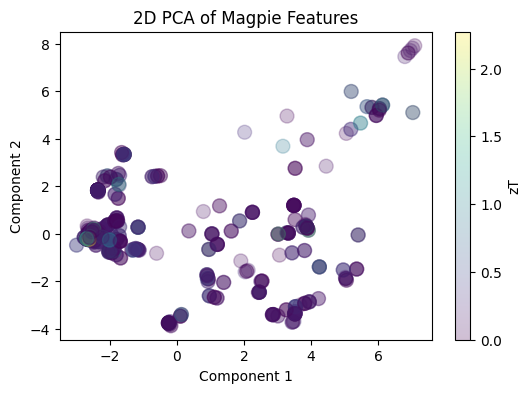

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select only the new features by dropping the original columns and handling NaNs
new_features_df = magpie_df.drop(columns=df.columns).dropna()

# Extract feature values 
X = new_features_df.values
X_standardised = StandardScaler().fit_transform(X)

# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_standardised)

# Create a single plot for visualisation
fig, ax = plt.subplots(figsize=(6, 4))

# Select a label for coloring (assuming zT column exists in the original df)
color_map = df["zT"].values  # Use original DataFrame for the label (e.g., zT)

# Scatter plot in 2D space
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=color_map, cmap='viridis', alpha=0.25, s=100)

# Add labels and title
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_title("2D PCA of Magpie Features")

# Add colour bar
fig.colorbar(scatter, ax=ax, label="zT")

# Show the plot
plt.show()

Let’s check how much variance is captured by the first two principal components. Capturing above 50% of the variance with two dimensions is generally acceptable for initial exploration. However, for practical applications, we might need to increase the number of components to explain a higher proportion of the variance (e.g. 80%-90%) to ensure sufficient representation of the data.

In [12]:
# Check explained variance 
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print(f"Explained variance by Component 1: {explained_variance[0]:.2f}")
print(f"Explained variance by Component 2: {explained_variance[1]:.2f}")
print(f"Cumulative variance explained by 2 components: {cumulative_variance[1]:.2f}")

Explained variance by Component 1: 0.35
Explained variance by Component 2: 0.20
Cumulative variance explained by 2 components: 0.55



Now, wouldn't it be nice if we could see what material each data point refers to. [Plotly](https://plotly.com/python/) can help with that.

In [13]:
import plotly.express as px

# Add the zT column and composition column from the original DataFrame for coloring and hover info
plot_df = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])
plot_df['zT'] = df['zT'].values
plot_df['composition'] = df['composition'].values  # Assuming this is the column with chemical formulas

# Create an interactive scatter plot using Plotly
fig = px.scatter(
    plot_df, 
    x='Component 1', 
    y='Component 2', 
    color='zT', 
    color_continuous_scale='Viridis', 
    opacity=0.6,
    hover_name='composition',  # Show chemical formula on hover
    hover_data={'Component 1': ':.2f', 'Component 2': ':.2f', 'zT': ':.2f'},  # Additional hover data
    labels={'zT': 'zT Value'}
)

fig.update_traces(marker=dict(size=10))  # Adjust the size value as needed

fig.update_layout(
    width=6*96,  # 6 inches converted to pixels
    height=4*96  # 4 inches converted to pixels
)

# Show the interactive plot
fig.show()

Finally, let's see how a 3D projection looks.

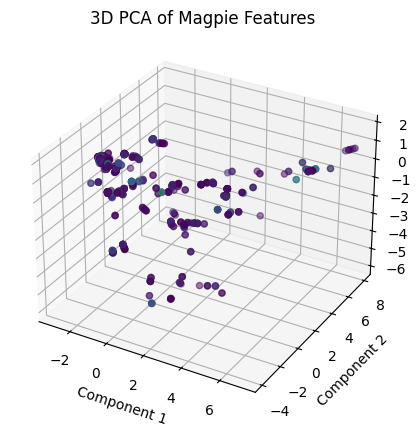

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA to reduce dimensionality to 3D
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X_standardised)

# Create a 3D plot for visualisation
fig = plt.figure(figsize=(6, 5))

# Create a 3D plot
ax = fig.add_subplot(111, projection='3d')
color_map = df["zT"].values 
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=color_map, cmap='viridis', alpha=0.5)

# Add labels and title
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.set_title("3D PCA of Magpie Features")

# Show the plot
plt.show()

<details>
<summary> Code hint </summary>
You can change the featurisation scheme to see the impact on the resulting visualisation and distribution of compositions
</details>

## 🚨 Exercise 3

<div style="background-color: #dceefb; border-left: 6px solid #ccc; margin: 20px; padding: 15px; border-radius: 5px;">
    <strong>💡 Coding exercises:</strong> The exercises are designed to apply what you have learned with room for creativity. It is fine to discuss solutions with your classmates, but the actual code should not be directly copied.
</div>

### Your details

In [19]:
import numpy as np

# Insert your values
Name = "Ayham Al-Saffar" # Replace with your name
CID = 2137313 # Replace with your College ID (as a numeric value with no leading 0s)

# Set a random seed using the CID value
CID = int(CID)
np.random.seed(CID)

# Print the message
print("This is the work of " + Name + " [CID: " + str(CID) + "]")

This is the work of Ayham Al-Saffar [CID: 2137313]


### Problem

Unsupervised machine learning techniques, such as dimensionality reduction, allow us to uncover patterns and relationships in complex datasets. 

A set of tasks will be assigned to apply different techniques to visualise clustering to explore the properties of thermoelectric materials.

In [31]:
from sklearn.manifold import TSNE

def create_plot(perplexity: int, learning_rate: int):
    TSNE_reducer = TSNE(n_components=2, random_state=42)
    tsne_reduced_data = TSNE_reducer.fit_transform(X_standardised)

    new_plot_df = pd.DataFrame(tsne_reduced_data, columns=['Component 1', 'Component 2'])
    new_plot_df['zT'] = df['zT'].values
    new_plot_df['composition'] = df['composition'].values

    fig = px.scatter(
        new_plot_df, 
        x='Component 1', 
        y='Component 2', 
        color='zT', 
        color_continuous_scale='Viridis', 
        opacity=0.6,
        hover_name='composition',
        hover_data={'Component 1': ':.2f', 'Component 2': ':.2f', 'zT': ':.2f'},
        labels={'zT': 'zT Value'}
    )

    fig.update_traces(marker=dict(size=10))
    fig.update_layout(width=6*96, height=4*96)
    return fig

In [32]:
fig = create_plot(perplexity=30, learning_rate=200)
fig.show()

T-SNE is better at seperating the data into distinct clusters, but each cluster contains compounds with a range of different zT values. This indicates that it doesn't really seperate the data into different zT ranges much better.

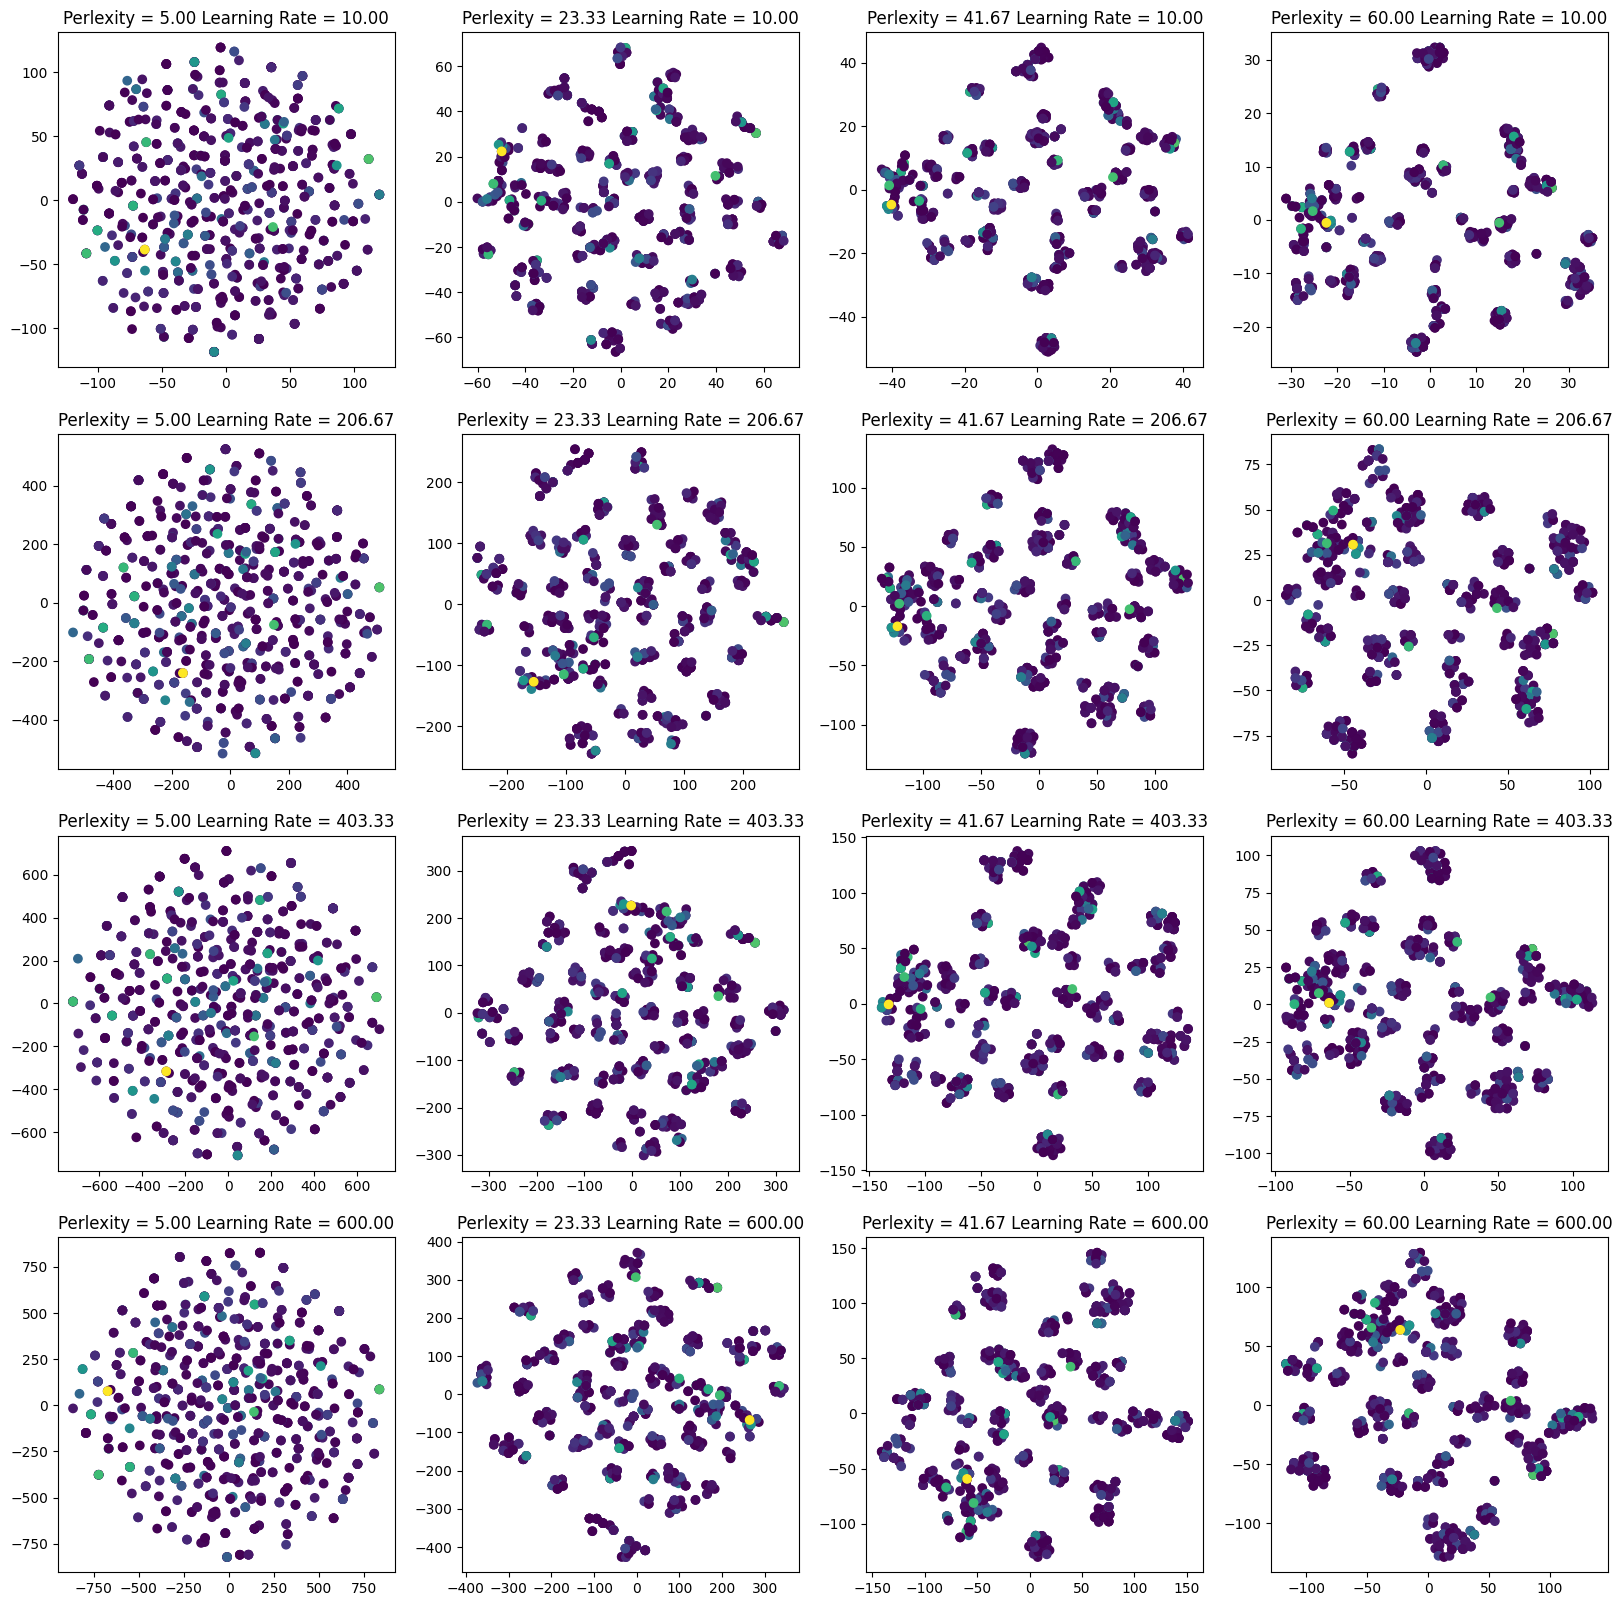

In [40]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, lr in enumerate(np.linspace(start=10, stop=600, num=4)):
    for j, ppx in enumerate(np.linspace(start=5, stop=60, num=4)):
        TSNE_reducer = TSNE(n_components=2, random_state=42, learning_rate=lr, perplexity=ppx)
        tsne_reduced_data = TSNE_reducer.fit_transform(X_standardised)

        axes[i, j].scatter(tsne_reduced_data[:, 0], tsne_reduced_data[:, 1], c=df['zT'].values)
        axes[i, j].set_title(f'Perlexity = {ppx:.2f} Learning Rate = {lr:.2f}')

pass

A value of perplexity above 5 is key to creating distinct clusters, and increasing this value tends to create more distinct clusters.

The learning rate does not seem to effect how defined the clusters show. Perhaps with a much larger dataset, a very low learning rate would make the model take too long to converge.

In all cases, each plot contains clusters with equally high varieties of zT values.

<div style="background-color: #d4edda; border-left: 6px solid #ccc; margin: 20px; padding: 15px; border-radius: 5px;">
    <strong>📓 Submission:</strong> When your notebook is complete in Google Colab, go to <em>File > Download</em> and choose <code>.ipynb</code>. The completed file should be uploaded to Blackboard under assignments for MATE70026.
</div>

## 🌊 Dive deeper

* _Level 1:_ Tackle Chapter 8 on Linear Unsupervised Learning in [Machine Learning Refined](https://github.com/jermwatt/machine_learning_refined#what-is-new-in-the-second-edition).

* _Level 2:_ Read about our attempt to screen _all inorganic materials_ (with caveats) in the journal [Chem](https://doi.org/10.1016/j.chempr.2016.09.010). 

* _Level 3:_ Watch a [seminar](https://www.youtube.com/watch?v=gd-uahI5xbA) by quantum chemist Anatole von Lilienfeld on chemical space. 